### Build and test a Naive Bayes classifier.

We will again use the iris data. 

Goals for this notebook:
1. Understand NB well enough to make a prediction by hand
2. Use the naive_bayes module in scikit-learn
3. First glimpse at the pandas package for manipulating data

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split

/Users/zalexander/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load the data, which is included in sklearn.
iris = load_iris()
print 'Iris target names:', iris.target_names
print 'Iris feature names:', iris.feature_names
X, y = iris.data, iris.target

Iris target names: ['setosa' 'versicolor' 'virginica']
Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
X.shape

(150, 4)

In [5]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
X_train.shape

(112, 4)

In [7]:
X_test.shape

(38, 4)

In [8]:
y_train.shape

(112,)

## EDA

The iris feature values are real valued measurements in centimeters. Let's look at histograms of each feature.

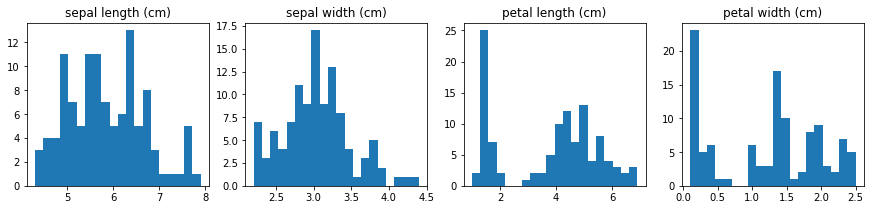

In [9]:
# Create a new figure and set the figsize argument so we get square-ish plots of the 4 features.
plt.figure(figsize=(15, 3))

# Iterate over the features, creating a subplot with a histogram for each one.
for feature in range(X_train.shape[1]):
    plt.subplot(1, 4, feature+1)
    plt.hist(X_train[:,feature], 20)
    plt.title(iris.feature_names[feature])

In [10]:
X_train[:5, :]

array([[ 5.1,  3.7,  1.5,  0.4],
       [ 6.3,  2.8,  5.1,  1.5],
       [ 6.5,  3.2,  5.1,  2. ],
       [ 5.6,  2.9,  3.6,  1.3],
       [ 5.1,  2.5,  3. ,  1.1]])

To make things simple, let's binarize these feature values. That is, we'll treat each measurement as either "short" or "long". I'm just going to choose a threshold for each feature.

In [11]:
# Define a function that applies a threshold to turn real valued iris features into 0/1 features.
# 0 will mean "short" and 1 will mean "long".
def binarize_iris(data, thresholds=[6.0, 3.0, 2.5, 1.0]):
    # Initialize a new feature array with the same shape as the original data.
    binarized_data = np.zeros(data.shape)

    # Apply a threshold  to each feature.
    for feature in range(data.shape[1]):
        binarized_data[:,feature] = data[:,feature] > thresholds[feature]
    return binarized_data

# Create new binarized training and test data
binarized_train_data = binarize_iris(X_train)
binarized_test_data = binarize_iris(X_test)

print X_train[:10, ]
print binarized_train_data[:10, ]

[[ 5.1  3.7  1.5  0.4]
 [ 6.3  2.8  5.1  1.5]
 [ 6.5  3.2  5.1  2. ]
 [ 5.6  2.9  3.6  1.3]
 [ 5.1  2.5  3.   1.1]
 [ 6.   2.2  5.   1.5]
 [ 6.9  3.1  4.9  1.5]
 [ 6.4  3.1  5.5  1.8]
 [ 4.7  3.2  1.3  0.2]
 [ 6.2  2.9  4.3  1.3]]
[[ 0.  1.  0.  0.]
 [ 1.  0.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 0.  0.  1.  1.]
 [ 0.  0.  1.  1.]
 [ 0.  0.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  1.  1.]]


Recall that Naive Bayes assumes conditional independence of features. With $Y$ the set of labels and $X$ the set of features ($y$ is a specific label and $x$ is a specific feature), Naive Bayes gives the probability of a label $y$ given input features $X$ as:

$ \displaystyle P(y|X) \approx 
  \frac { P(y) \prod_{x \in X} P(x|y) }
        { \sum_{y \in Y} P(y) \prod_{x \in X} P(x|y) }
$

Let's estimate some of these probabilities using maximum likelihood, which is just a matter of counting and normalizing. We'll start with the prior probability of the label $P(y)$.

In [12]:
# Initialize counters for all labels to zero.
label_counts = [0 for i in iris.target_names]

# Iterate over labels in the training data and update counts.
for label in y_train:
    label_counts[label] += 1

# Normalize counts to get a probability distribution.
total = sum(label_counts)
label_probs = [1.0 * count / total for count in label_counts]
for (prob, name) in zip(label_probs, iris.target_names):
    print '%15s : %.2f' %(name, prob)

         setosa : 0.32
     versicolor : 0.36
      virginica : 0.32


### Repeat above three cells using pandas

Pandas allows us to stop thinking about code in terms of procedures, and start thinking about code in terms of _data manipulation_.

- Check out pandas here: pandas.pydata.org
- [Here](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) is cheat sheet to get a sense for what is possible.
- [This](http://pandas.pydata.org/pandas-docs/stable/10min.html) is probably the best place to get started


Load the training data into a pandas data frame

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
colnames = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df = pd.DataFrame(X, columns=colnames)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
target = pd.Series(y)
target.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [21]:
df['target'] = target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [23]:
df = df.replace({'target': {0: 'setosa', 1: 'versicolor', 2: 'virginica'}})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
# Train test split
train_df, test_df = train_test_split(df)
train_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
15,5.7,4.4,1.5,0.4,setosa
121,5.6,2.8,4.9,2.0,virginica
68,6.2,2.2,4.5,1.5,versicolor
125,7.2,3.2,6.0,1.8,virginica
22,4.6,3.6,1.0,0.2,setosa


In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
train_df.shape

(112, 5)

Plot some histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cb953d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cc2ec10>]], dtype=object)

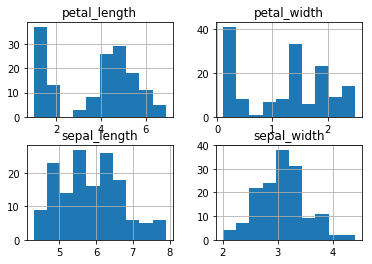

In [27]:
df.hist()

Binarize the columns

In [28]:
train_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
15,5.7,4.4,1.5,0.4,setosa
121,5.6,2.8,4.9,2.0,virginica
68,6.2,2.2,4.5,1.5,versicolor
125,7.2,3.2,6.0,1.8,virginica
22,4.6,3.6,1.0,0.2,setosa


In [30]:
thresholds = [6.0, 3.0, 2.5, 1.0]
train_df_binarized = train_df[colnames].apply(lambda row: row > thresholds , axis=1)
test_df_binarized = test_df[colnames].apply(lambda row: row > thresholds , axis=1)
train_df_binarized.head()

,sepal_length,sepal_width,petal_length,petal_width
15,False,True,False,False
121,False,False,True,True
68,True,False,True,True
125,True,True,True,True
22,False,True,False,False


Estimate priors

In [33]:
train_df['target'].value_counts(normalize=True)

setosa        0.383929
versicolor    0.339286
virginica     0.276786
Name: target, dtype: float64

## Naive Bayes by Hand

Next, let's estimate $P(X|Y)$, that is, the probability of each feature given each label. Remember that we can get the conditional probability from the joint distribution:

$\displaystyle P(X|Y) = \frac{ P(X,Y) } { P(Y) } \approx \frac{ \textrm{Count}(X,Y) } { \textrm{Count}(Y) }$

Let's think carefully about the size of the count matrix we need to collect. There are 3 labels $y_1$, $y_2$, and $y_3$ and 4 features $x_0$, $x_1$, $x_2$, and $x_3$. Each feature has 2 possible values, 0 or 1. So there are actually $4 \times 2 \times 3=24$ probabilities we need to estimate: 

$P(x_0=0, Y=y_0)$

$P(x_0=1, Y=y_0)$

$P(x_1=0, Y=y_0)$

$P(x_1=1, Y=y_0)$

...

However, we already estimated (above) the probability of each label. And, we know that each feature value is either 0 or 1. So, for example,

$P(x_0=0, Y=\textrm{setosa}) + P(x_0=1, Y=\textrm{setosa}) = P(Y=\textrm{setosa}) \approx 0.31$.

As a result, we can just estimate probabilities for one of the feature values, say, $x_i = 1$. This requires a $4 \times 3$ matrix.

In [35]:
# Append the target to train_df_binarized
train_df_binarized['target'] = train_df['target']
train_df_binarized.head()


,sepal_length,sepal_width,petal_length,petal_width,target
15,False,True,False,False,setosa
121,False,False,True,True,virginica
68,True,False,True,True,versicolor
125,True,True,True,True,virginica
22,False,True,False,False,setosa


In [36]:
subdf = train_df_binarized.loc[train_df_binarized['target']=='versicolor']
subdf.head()

,sepal_length,sepal_width,petal_length,petal_width,target
68,True,False,True,True,versicolor
78,False,False,True,True,versicolor
51,True,True,True,True,versicolor
63,True,False,True,True,versicolor
59,False,False,True,True,versicolor


In [39]:
subdf['sepal_length'].mean()

0.36842105263157893

In [41]:
# Calculate all the conditional probabilities
conditional_probs = train_df_binarized.groupby('target').mean()
conditional_probs

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
setosa,0.000000,0.813953,0.0,0.000000
versicolor,0.368421,0.105263,1.0,0.815789
virginica,0.838710,0.354839,1.0,1.000000


In [42]:
conditional_probs.loc['versicolor', 'sepal_length']

0.36842105263157893

In [34]:
thresholds

[6.0, 3.0, 2.5, 1.0]

That is P(sepal length > 6.0 | versicolor) = .368

In [43]:
# Calculate Priors
priors = train_df['target'].value_counts(normalize=True)
priors

setosa        0.383929
versicolor    0.339286
virginica     0.276786
Name: target, dtype: float64

In [44]:
priors['setosa']

0.38392857142857145

Now that we have all the pieces, let's try making a prediction for the first test example. 

In [45]:
test_example = test_df.iloc[0]
test_example

sepal_length           5.9
sepal_width            3.2
petal_length           4.8
petal_width            1.8
target          versicolor
Name: 70, dtype: object

In [46]:
test_example_binarized = test_df_binarized.iloc[0]
test_example_binarized

sepal_length    False
sepal_width      True
petal_length     True
petal_width      True
Name: 70, dtype: bool

#### Exercise

Let's step through the process of computing what Naive Bayes has to say about this specific test example. That is, we want to compute:
- P('versicolor' | test_example_binarized)
- P('virginica' | test_example_binarized)
- P('setosa' | test_example_binarized)

All the information we need is below:

In [47]:
print priors
print
print conditional_probs
print
print test_example_binarized

setosa        0.383929
versicolor    0.339286
virginica     0.276786
Name: target, dtype: float64

            sepal_length  sepal_width  petal_length  petal_width
target                                                          
setosa          0.000000     0.813953           0.0     0.000000
versicolor      0.368421     0.105263           1.0     0.815789
virginica       0.838710     0.354839           1.0     1.000000

sepal_length    False
sepal_width      True
petal_length     True
petal_width      True
Name: 70, dtype: bool


1: Write a function that takes a label as input and returns _log of the numerator_ of the NB equation. That is, $
\log \left[ P(y) * P(x | y) \right]
$

In [ ]:
def lognum(label):
    """
    For this function, we imagine a hard coded observation:
        
        test_example = [sepal_length=False, sepal_width=False, petal_length=True, petal_width=True]
        
    Input: (string) One of 'versicolor', 'viriginica', or 'setosa'
    Output: log P(test_example | label) (using the independence assumption)
    """    
    # Your code goes here
    pass

Test

In [ ]:
label = 'virginica'
lognum('virginica')

2: Compute the log of the numberator for each possible label

3: Convert the results of (2) into probabilities

## Naive Bayes in Scikit-Learn

In [ ]:
print train_df_binarized.head()
print test_df_binarized.head()

### BernoulliNB means _the features are distributed Bernoulli_

How accurate is the BernoulliNB classifier, when trained on train_df_binarized, and tested on test_df_binarized?

In [ ]:
from sklearn.naive_bayes import BernoulliNB


### GaussianNB _means the features are distributed Gaussian_

Exercise: Build a GaussianNB model using sklearn, and estimate the accuracy on the test set.

In [ ]:
from sklearn.naive_bayes import GaussianNB


Let's look at those predicted probabilities

The predicted probabilities are _very_ confident. Since the test predictions are also extremely accurate, we might conclude that GaussianNB is an appropriate model

### MultinomialNB _means the features are distributed multinomial_

In [ ]:
cuts = [0, .2, .4, .6, .8, 1]
breaks = train_df[colnames].quantile(cuts)
breaks.loc[0, :] = 0  # Set a global minimimum
breaks.loc[1, :] = 10  # Set a global maximum
print breaks

In [ ]:
# Discretize each column according to the breaks defined above
train_df_mult = train_df[colnames].apply(
    lambda col: pd.cut(col, bins=breaks[col.name], include_lowest=True, labels=False)
)
test_df_mult = test_df[colnames].apply(
    lambda col: pd.cut(col, bins=breaks[col.name], include_lowest=True, labels=False))

In [ ]:
train_df_mult.head()

In [ ]:
from sklearn.naive_bayes import MultinomialNB



## Bonus:

Consider the following threshold possibilities for each of the four features.

```
sepal_length_thresh = [5.0, 5.6, 6.2, 6.5]
sepal_width_thresh = [2.7, 3.0, 3.2, 3.4]
petal_length_thresh = [2, 3, 4, 5]
petal_width_thresh = [.5, 1, 1.5, 2]
```

Find the combination of thresholds (one from each list), that gives the BernoulliNB model with the highest accuracy.

Use a train/test/dev split, and report accuracy on the test set.